In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# LDA

In [3]:
# read in text data

file1 = open("lda_output0-2.txt","r")
text_lines1 = file1.readlines()

file2 = open("lda_output3-5.txt","r")
text_lines2 = file2.readlines()

file3 = open("lda_output6-7.txt","r")
text_lines3 = file3.readlines()

file4 = open("lda_output8-9.txt","r")
text_lines4 = file4.readlines()

In [4]:
text_lines = text_lines1 + text_lines2 + text_lines3 + text_lines4

In [5]:
# create a dataframe of model times

lda_times_df = pd.DataFrame()

In [6]:
# go through each line of the file and grab model times

column = -1
time = []

for line in text_lines:
    
    tokens = str.split(line)
    
    if (tokens[0] == "Iteration"):
        # move to next column in df 
        column = column + 1
    elif (tokens[0] == "Model"):
        # keep model time
        time.append(float(tokens[2])) 
        
    if(len(time) == 30):
        # add as a column in df and then reset time list
        lda_times_df[str(column)] = time
        time = []
        


In [7]:
lda_times_df

,0,1,2,3,4,5,6,7,8,9
0,272.657580,276.142756,292.511224,392.259288,400.062123,411.670841,426.647285,407.782157,277.053354,276.405831
1,321.775614,317.339250,323.568360,513.593804,527.230088,516.728460,549.829550,551.438362,318.805917,331.718722
2,326.584006,336.303643,330.964492,552.052722,540.509586,561.208350,582.442803,570.092353,337.045899,345.519367
3,358.062812,353.218707,360.558456,594.516223,578.115218,567.965597,596.053649,602.351976,351.068215,353.658054
4,371.027125,377.359338,377.320657,588.853273,596.210934,611.165377,611.250662,628.823179,376.581802,367.623017
5,406.288861,392.758472,395.971336,619.820306,612.570371,632.867401,642.884160,650.624465,397.020864,394.142665
6,410.952080,404.734454,423.336490,647.308396,666.701494,667.209329,683.087895,691.489541,419.974033,407.590556
7,425.459877,417.700708,422.574735,664.759558,682.858374,673.046992,690.390885,680.721985,425.891298,426.653322
8,449.082790,445.985340,444.590748,707.622177,710.465333,709.732909,734.645781,757.645856,448.191538,434.656428
9,470.621719,466.394799,460.140285,732.911372,736.192965,745.048812,761.814360,764.069109,464.985921,469.098651


# NMF

In [8]:
# read in text data

file1 = open("nmf_output0-1.txt","r")
text_lines1 = file1.readlines()

file2 = open("nmf_output2-3.txt","r")
text_lines2 = file2.readlines()

file3 = open("nmf_output4-5.txt","r")
text_lines3 = file3.readlines()

file4 = open("nmf_output6-7.txt","r")
text_lines4 = file4.readlines()

file5 = open("nmf_output8-9.txt","r")
text_lines5 = file5.readlines()

In [9]:
text_lines = text_lines1 + text_lines2 + text_lines3 + text_lines4 + text_lines5

In [10]:
# create a dataframe of model times

nmf_times_df = pd.DataFrame()

In [11]:
# go through each line of the file and grab model times

column = -1
time = []

for line in text_lines:
    
    tokens = str.split(line)
    
    if (tokens[0] == "Iteration"):
        # move to next column in df 
        column = column + 1
    elif (tokens[0] == "Model"):
        # keep model time
        time.append(float(tokens[2])) 
        
    if(len(time) == 30):
        # add as a column in df and then reset time list
        nmf_times_df[str(column)] = time
        time = []
        


In [12]:
nmf_times_df

,0,1,2,3,4,5,6,7,8,9
0,79.504565,82.426517,77.275838,83.335129,80.910949,81.107661,83.031173,79.000479,92.222492,100.067622
1,100.456477,93.175079,94.580275,97.934390,108.294918,108.720300,111.475058,105.828075,118.516168,119.423887
2,132.391675,128.897943,126.886136,129.433822,152.462597,155.806140,152.060002,161.683608,159.112117,132.428722
3,187.923403,175.980954,169.542002,199.303298,211.356705,205.341120,210.819488,220.050507,216.463844,236.600923
4,240.308872,145.501169,650.764026,149.881412,293.649747,460.231997,214.714281,475.462847,294.278994,185.012887
5,765.222405,329.859802,502.594155,461.328362,894.246552,610.451949,262.984778,488.823032,284.778690,581.304731
6,511.819224,946.760309,952.271972,943.498657,807.982495,501.120557,1119.693820,656.746003,723.607596,658.583267
7,896.354633,651.427731,589.265766,589.470862,1274.593996,1293.485051,883.876288,1259.967961,1308.424666,1316.935583
8,988.818058,1287.258612,1259.168143,757.335287,1125.505309,1540.224215,1544.173600,1330.375806,1003.196111,1573.587047
9,1317.721975,1441.707263,828.779049,1045.777286,1461.387730,1401.249434,1271.050645,1713.578789,1763.539359,904.600560


# Seaborn plot

In [13]:
# convert times to minutes

lda_times_df = lda_times_df/60
nmf_times_df = nmf_times_df/60

In [14]:
# add number of topics column for melt

lda_times_df["n_topics"] = list(range(5,131,5)) + [140, 150, 175, 200]
nmf_times_df["n_topics"] = list(range(5,131,5)) + [140, 150, 175, 200]

In [15]:
# change dfs from wide to long format

lda_melt=lda_times_df.melt(id_vars='n_topics',value_vars=[str(i) for i in range(10)],value_name='Time' )
nmf_melt=nmf_times_df.melt(id_vars='n_topics',value_vars=[str(i) for i in range(10)],value_name='Time' )

lda_melt['Model_Type']='LDA'
nmf_melt['Model_Type']='NMF'

all_models=pd.concat([lda_melt,nmf_melt])

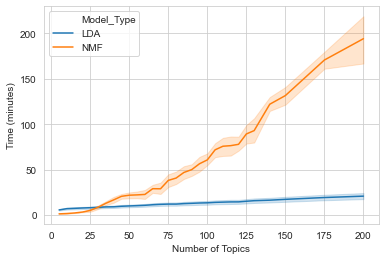

In [17]:
# Time plots by number of topics

sns.set_style("whitegrid")
sns.lineplot(x="n_topics", y="Time", hue='Model_Type', data=all_models)
plt.xlabel('Number of Topics');
plt.ylabel('Time (minutes)');

plt.savefig("model_time_comparison.png", dpi = 800)